In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://github.com/m0-k1/Linear-Regression_model/blob/master/Basic%20Linear%20Regression.ipynb

In [ ]:
# Reading data using pandas
data = pd.read_csv("Linear Regression - sheet1.csv")
data

In [24]:
data.describe()
data.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,201.888889
299,300,201.888889


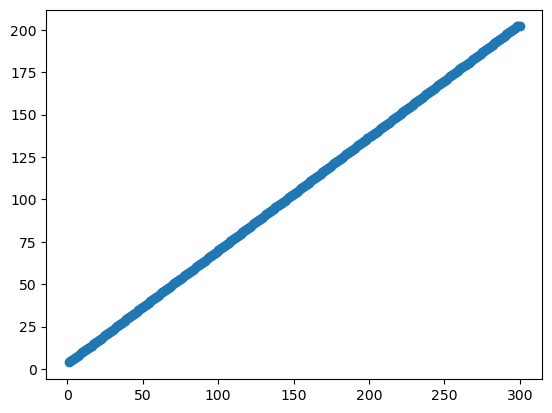

In [9]:
# PLotting the parameters
plt.scatter(data['X'],data['Y'])

In [26]:
x_data = data.drop('Y',axis=1)
x_data = np.array(x_data)
x_data = x_data.reshape(-1,1)


In [12]:
ones = np.ones([x_data.shape[0], 1])

In [13]:
X = np.concatenate([ones, x_data],1)

In [ ]:
X

In [29]:
y_data = data.drop('X',axis =1)
y_data = np.array(y_data)
Y = y_data.reshape(-1,1)
Y.shape

(300, 1)

Method 1 - Using Gradient Descent

In [17]:
# Method 1
# notice small alpha value
alpha = 0.00001
iters = 50000

theta = np.array([[1.0, 1.0]])
theta.shape

(1, 2)

In [18]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [30]:
computeCost(X, Y,theta)

1566.6517279711852

In [20]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [21]:
g, cost = gradientDescent(X, Y, theta, alpha, iters)  
print(g, cost)

[[1.26002162 0.67639517]] 0.48900027797562445


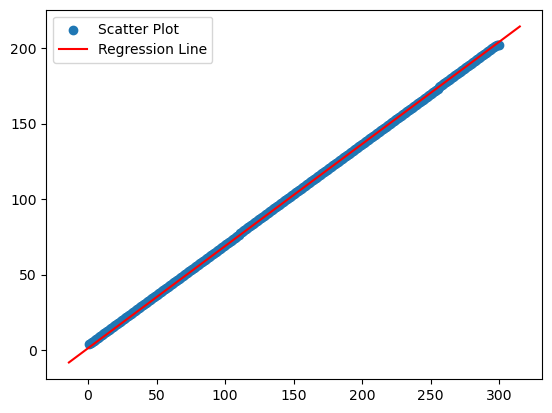

In [22]:
# Plotting scatter points
plt.scatter(data['X'],data['Y'], label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

Method 2 - Using Ordinary Least Mean Square Method

In [32]:
# Method 2
x_mean = np.mean(x_data)
y_mean = np.mean(Y)
numerator = 0
denominator = 0

In [33]:
for i in range(len(X)):
    numerator += (x_data[i] - x_mean) * (Y[i] - y_mean)
    denominator += (x_data[i] - x_mean) ** 2
theta1 = numerator/denominator
theta0 = y_mean - (theta1 * x_mean)

In [34]:
# Plotting Values and Regression Line
max_x = np.max(X) + 10
min_x = np.min(X) - 10
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = theta0 + theta1 * x 

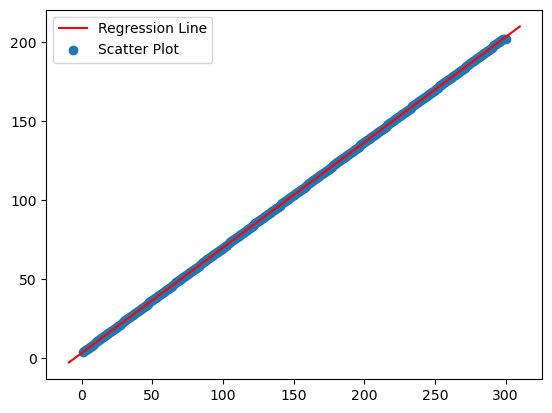

In [35]:
# Ploting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x_data, Y, label='Scatter Plot')
plt.legend()
plt.show()

In [36]:
#Root Mean Squared Error

rmse = 0
for i in range(len(x_data)):
    y_pred=  theta0 + theta1* x_data[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/len(x_data))
print(rmse)

[0.08503591]


In [37]:
# R² Score
sumofsquares = 0
sumofresiduals = 0
for i in range(len(x_data)) :
    y_pred = theta0 + theta1 * x_data[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.99999783]
